In [2]:
import pandas as pd
from tqdm.auto import tqdm
import numpy as np
from pathlib import Path
import gzip
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
# datasetName = "debate2024_Jun_bluesky"
datasetName = "trumpIncident2024_Jul_bluesky"
dataPath = Path("Data")

In [5]:
with gzip.open(dataPath / f"{datasetName}.feather.gz", 'rb') as f:
    df = pd.read_feather(f)

In [6]:
df

,creation_date,hashtags,mentioned_users,urls,text,user_id,post_id,linked_post,linked_post_user_id,root_post,root_post_user_id,post_type,data_langs
0,2024-07-13 00:00:00.152000+00:00,[],[],[],Dear lord!,did:plc:lzckrwnkqjd5wmft6shratai,at://did:plc:lzckrwnkqjd5wmft6shratai/app.bsky...,at://did:plc:ihavsdtkraodnytrzncjlrsi/app.bsky...,did:plc:ihavsdtkraodnytrzncjlrsi,at://did:plc:ihavsdtkraodnytrzncjlrsi/app.bsky...,did:plc:ihavsdtkraodnytrzncjlrsi,reply,en
1,2024-07-13 00:00:00.289000+00:00,[],[],[],You don't think Anakin can win?,did:plc:4j3zupp5vmzxsy3tqkdaxoe7,at://did:plc:4j3zupp5vmzxsy3tqkdaxoe7/app.bsky...,None,None,None,None,post,None
2,2024-07-13 00:00:00.267000+00:00,[],[],[],there's something about Vance's deep-set eyes ...,did:plc:a5f3sq7smc3v3jyglbi2fi5j,at://did:plc:a5f3sq7smc3v3jyglbi2fi5j/app.bsky...,at://did:plc:jb2q4yqmgpmefxd4xx66gepm/app.bsky...,did:plc:jb2q4yqmgpmefxd4xx66gepm,at://did:plc:e6n7jxtu2qrhwvp3j6ib6sq6/app.bsky...,did:plc:e6n7jxtu2qrhwvp3j6ib6sq6,reply,en
3,2024-07-12 23:59:59.603000+00:00,[],[],[],Vitória do dia consegui cagar,did:plc:sz5ppt4vxaaqbjq5v6a7wz72,at://did:plc:sz5ppt4vxaaqbjq5v6a7wz72/app.bsky...,None,None,None,None,post,pt
4,2024-07-13 00:00:00.060000+00:00,[],[],[],ぽなかがおかしいですわ,did:plc:jumthid7gybjbjch3y6fpg4l,at://did:plc:jumthid7gybjbjch3y6fpg4l/app.bsky...,None,None,None,None,post,ja
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021702,2024-07-13 23:59:57.573000+00:00,[],[],[],"We are very close, my friends.",did:plc:o236pw6sfuamjd6wpmo5ja2b,at://did:plc:o236pw6sfuamjd6wpmo5ja2b/app.bsky...,at://did:plc:m74p3ajqqjqh3l4iresidmjj/app.bsky...,did:plc:m74p3ajqqjqh3l4iresidmjj,None,None,repost,ar
1021703,2024-07-13 23:59:58.647000+00:00,[],[],[],Quick points:\n1) Assassination attempts are b...,did:plc:hrqtteaxikxtkhwkdzpgxny7,at://did:plc:hrqtteaxikxtkhwkdzpgxny7/app.bsky...,at://did:plc:wgfz5e3rv4mxgtcpypddfruu/app.bsky...,did:plc:wgfz5e3rv4mxgtcpypddfruu,at://did:plc:uc3tjp674x3v5egou2j3e4uh/app.bsky...,did:plc:uc3tjp674x3v5egou2j3e4uh,repost,en
1021704,2024-07-13 23:59:58.641000+00:00,[],[],[],MAGAすぎる,did:plc:cxc7ktpr56ai356qru52ue64,at://did:plc:cxc7ktpr56ai356qru52ue64/app.bsky...,at://did:plc:5aorlinzeghtafkwkgxmuxhk/app.bsky...,did:plc:5aorlinzeghtafkwkgxmuxhk,at://did:plc:qiknc4t5rq7yngvz7g4aezq7/app.bsky...,did:plc:qiknc4t5rq7yngvz7g4aezq7,repost,en
1021705,2024-07-13 23:59:59.141000+00:00,[],[],[],This is 100% what Republicans would do if this...,did:plc:ncclbn2udcucpir2movosf5c,at://did:plc:ncclbn2udcucpir2movosf5c/app.bsky...,at://did:plc:w6y3c7vijhfucfyyrwcg4bei/app.bsky...,did:plc:w6y3c7vijhfucfyyrwcg4bei,None,None,repost,en


In [7]:
df.head(5)

,creation_date,hashtags,mentioned_users,urls,text,user_id,post_id,linked_post,linked_post_user_id,root_post,root_post_user_id,post_type,data_langs
0,2024-07-13 00:00:00.152000+00:00,[],[],[],Dear lord!,did:plc:lzckrwnkqjd5wmft6shratai,at://did:plc:lzckrwnkqjd5wmft6shratai/app.bsky...,at://did:plc:ihavsdtkraodnytrzncjlrsi/app.bsky...,did:plc:ihavsdtkraodnytrzncjlrsi,at://did:plc:ihavsdtkraodnytrzncjlrsi/app.bsky...,did:plc:ihavsdtkraodnytrzncjlrsi,reply,en
1,2024-07-13 00:00:00.289000+00:00,[],[],[],You don't think Anakin can win?,did:plc:4j3zupp5vmzxsy3tqkdaxoe7,at://did:plc:4j3zupp5vmzxsy3tqkdaxoe7/app.bsky...,None,None,None,None,post,None
2,2024-07-13 00:00:00.267000+00:00,[],[],[],there's something about Vance's deep-set eyes ...,did:plc:a5f3sq7smc3v3jyglbi2fi5j,at://did:plc:a5f3sq7smc3v3jyglbi2fi5j/app.bsky...,at://did:plc:jb2q4yqmgpmefxd4xx66gepm/app.bsky...,did:plc:jb2q4yqmgpmefxd4xx66gepm,at://did:plc:e6n7jxtu2qrhwvp3j6ib6sq6/app.bsky...,did:plc:e6n7jxtu2qrhwvp3j6ib6sq6,reply,en
3,2024-07-12 23:59:59.603000+00:00,[],[],[],Vitória do dia consegui cagar,did:plc:sz5ppt4vxaaqbjq5v6a7wz72,at://did:plc:sz5ppt4vxaaqbjq5v6a7wz72/app.bsky...,None,None,None,None,post,pt
4,2024-07-13 00:00:00.060000+00:00,[],[],[],ぽなかがおかしいですわ,did:plc:jumthid7gybjbjch3y6fpg4l,at://did:plc:jumthid7gybjbjch3y6fpg4l/app.bsky...,None,None,None,None,post,ja


In [8]:
df.tail(5)

,creation_date,hashtags,mentioned_users,urls,text,user_id,post_id,linked_post,linked_post_user_id,root_post,root_post_user_id,post_type,data_langs
1021702,2024-07-13 23:59:57.573000+00:00,[],[],[],"We are very close, my friends.",did:plc:o236pw6sfuamjd6wpmo5ja2b,at://did:plc:o236pw6sfuamjd6wpmo5ja2b/app.bsky...,at://did:plc:m74p3ajqqjqh3l4iresidmjj/app.bsky...,did:plc:m74p3ajqqjqh3l4iresidmjj,None,None,repost,ar
1021703,2024-07-13 23:59:58.647000+00:00,[],[],[],Quick points:\n1) Assassination attempts are b...,did:plc:hrqtteaxikxtkhwkdzpgxny7,at://did:plc:hrqtteaxikxtkhwkdzpgxny7/app.bsky...,at://did:plc:wgfz5e3rv4mxgtcpypddfruu/app.bsky...,did:plc:wgfz5e3rv4mxgtcpypddfruu,at://did:plc:uc3tjp674x3v5egou2j3e4uh/app.bsky...,did:plc:uc3tjp674x3v5egou2j3e4uh,repost,en
1021704,2024-07-13 23:59:58.641000+00:00,[],[],[],MAGAすぎる,did:plc:cxc7ktpr56ai356qru52ue64,at://did:plc:cxc7ktpr56ai356qru52ue64/app.bsky...,at://did:plc:5aorlinzeghtafkwkgxmuxhk/app.bsky...,did:plc:5aorlinzeghtafkwkgxmuxhk,at://did:plc:qiknc4t5rq7yngvz7g4aezq7/app.bsky...,did:plc:qiknc4t5rq7yngvz7g4aezq7,repost,en
1021705,2024-07-13 23:59:59.141000+00:00,[],[],[],This is 100% what Republicans would do if this...,did:plc:ncclbn2udcucpir2movosf5c,at://did:plc:ncclbn2udcucpir2movosf5c/app.bsky...,at://did:plc:w6y3c7vijhfucfyyrwcg4bei/app.bsky...,did:plc:w6y3c7vijhfucfyyrwcg4bei,None,None,repost,en
1021706,2024-07-13 23:59:57.928000+00:00,[],[],[],"Yeah I keep seeing this reaction, but it’s who...",did:plc:76hfixjnuk377x5qvieqzqys,at://did:plc:76hfixjnuk377x5qvieqzqys/app.bsky...,at://did:plc:cnpe7qvcyjrhm6w7w7e4atur/app.bsky...,did:plc:cnpe7qvcyjrhm6w7w7e4atur,None,None,repost,en


In [9]:
df.text.head(5)

0                                           Dear lord!
1                      You don't think Anakin can win?
2    there's something about Vance's deep-set eyes ...
3                        Vitória do dia consegui cagar
4                                          ぽなかがおかしいですわ
Name: text, dtype: object

In [10]:
df["text"].head(5)

0                                           Dear lord!
1                      You don't think Anakin can win?
2    there's something about Vance's deep-set eyes ...
3                        Vitória do dia consegui cagar
4                                          ぽなかがおかしいですわ
Name: text, dtype: object

In [11]:
df.keys()

Index(['creation_date', 'hashtags', 'mentioned_users', 'urls', 'text',
       'user_id', 'post_id', 'linked_post', 'linked_post_user_id', 'root_post',
       'root_post_user_id', 'post_type', 'data_langs'],
      dtype='object')

In [12]:
df.post_type

0           reply
1            post
2           reply
3            post
4            post
            ...  
1021702    repost
1021703    repost
1021704    repost
1021705    repost
1021706    repost
Name: post_type, Length: 1021707, dtype: object

In [13]:
df.post_type.value_counts()

post_type
post      444562
reply     368580
repost    208565
Name: count, dtype: int64

In [14]:
df.iloc[0]

creation_date                           2024-07-13 00:00:00.152000+00:00
hashtags                                                              []
mentioned_users                                                       []
urls                                                                  []
text                                                          Dear lord!
user_id                                 did:plc:lzckrwnkqjd5wmft6shratai
post_id                at://did:plc:lzckrwnkqjd5wmft6shratai/app.bsky...
linked_post            at://did:plc:ihavsdtkraodnytrzncjlrsi/app.bsky...
linked_post_user_id                     did:plc:ihavsdtkraodnytrzncjlrsi
root_post              at://did:plc:ihavsdtkraodnytrzncjlrsi/app.bsky...
root_post_user_id                       did:plc:ihavsdtkraodnytrzncjlrsi
post_type                                                          reply
data_langs                                                            en
Name: 0, dtype: object

In [15]:
df.dtypes

creation_date          datetime64[ns, UTC]
hashtags                            object
mentioned_users                     object
urls                                object
text                                object
user_id                             object
post_id                             object
linked_post                         object
linked_post_user_id                 object
root_post                           object
root_post_user_id                   object
post_type                           object
data_langs                          object
dtype: object

<Axes: xlabel='creation_date'>

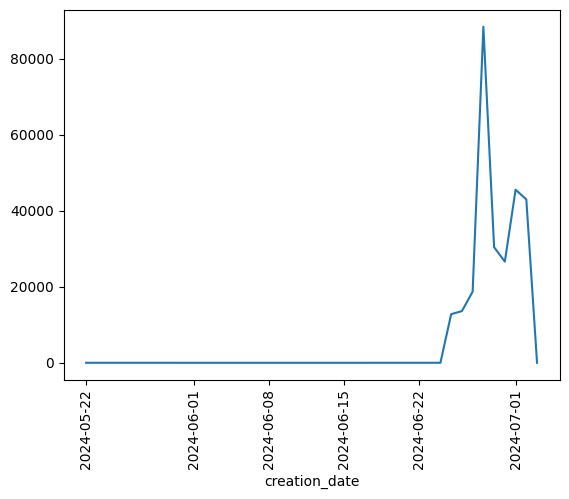

In [19]:
df['creation_date'].dt.date.value_counts().sort_index().plot(rot=90)

<Axes: xlabel='creation_date'>

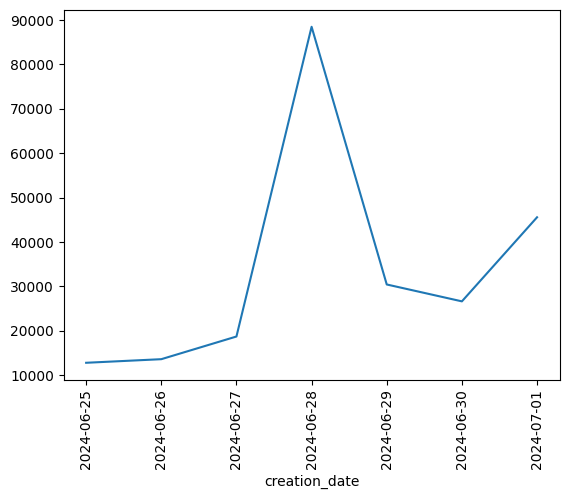

In [20]:
start_date = '2024-06-25'
end_date = '2024-07-02'
dfFiltered = df[df['creation_date'].between(start_date, end_date)]
dfFiltered['creation_date'].dt.date.value_counts().sort_index().plot(rot=90)

<Axes: xlabel='Number of posts', ylabel='Language'>

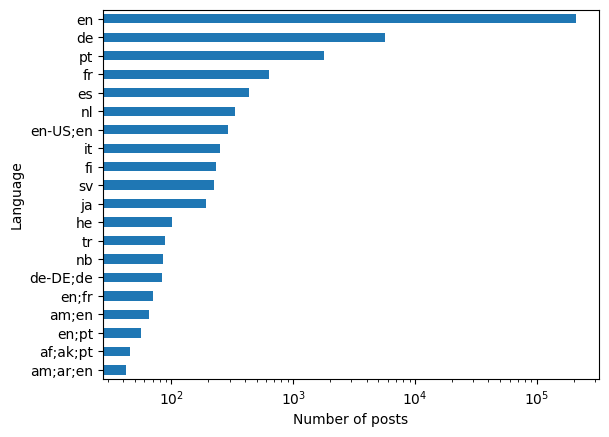

In [21]:
display(dfFiltered["data_langs"].value_counts(ascending=True).tail(20).plot(kind='barh',logx=True,ylabel="Language",xlabel="Number of posts"))

<Axes: xlabel='Number of posts', ylabel='Hashtag'>

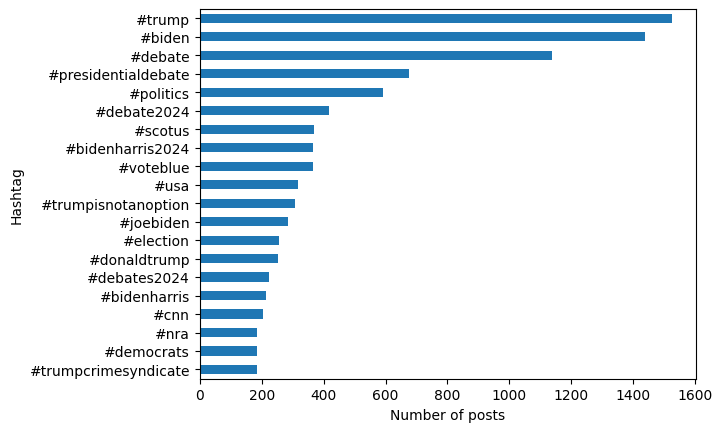

In [30]:
# get counts of the hashtags
# hashtags are lists of strings
# clean each hashtag
hashtags = dfFiltered["hashtags"].dropna().apply(lambda hashtagList: [hashtag.lower().strip() for hashtag in hashtagList])
hashtagsExploded = hashtags.explode()
hashtagsExplodedCounts = hashtagsExploded.value_counts(ascending=True)
hashtagsExplodedCounts.tail(20).plot(kind='barh',xlabel="Number of posts",ylabel="Hashtag")

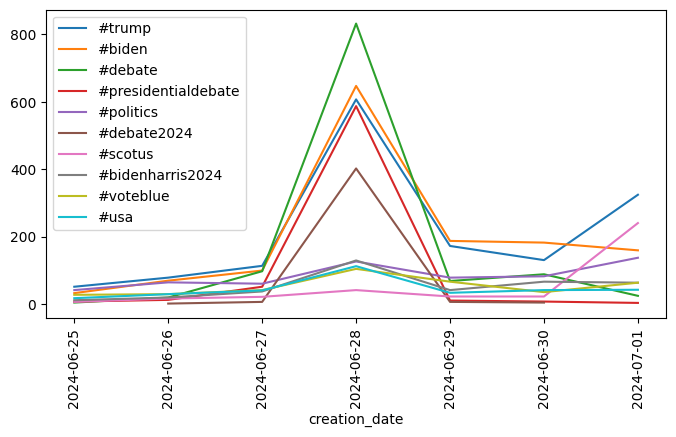

In [34]:
top_hashtags = hashtagsExplodedCounts.tail(10).iloc[::-1].index
days = dfFiltered['creation_date'].dt.date.unique()
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
for hashtag in top_hashtags:
    posts_with_hashtag = dfFiltered[hashtags.apply(lambda hashtags: hashtag in hashtags)]
    posts_with_hashtag['creation_date'].dt.date.value_counts().sort_index().plot(rot=90, label=hashtag, ax=ax)
plt.legend()


In [35]:
# Custom from the audience

In [ ]:
# Save to filtered feather format 
with gzip.open(dataPath / f"{datasetName}_filtered.feather.gz", 'wb') as f:
    dfFiltered.reset_index(drop=True).to_feather(f)